# Basket option implementation based on normal model

In [165]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from option_models import basket
from option_models import bsm
from option_models import normal


In [96]:
### only run this when you changed the class definition
import imp
imp.reload(basket)

<module 'option_models.basket' from 'G:\\PHBS\\Second Year\\Semester1\\Module1\\ASP\\Github\\PHBS_ASP_2018\\HW3\\option_models\\basket.py'>

In [142]:
# A trivial test case 1: 
# one asset have 100% weight (the others zero)
# the case should be equivalent to the BSM or Normal model price

spot = np.ones(4) * 100
vol = np.ones(4) * 0.4
weights = np.array([1, 0, 0, 0])
divr = np.zeros(4)
intr = 0
cor_m = 0.5*np.identity(4) + 0.5
texp = 5
strike = 120

print(weights)

np.random.seed(123456)
price_basket = basket.basket_price_mc(strike, spot, vol*spot, weights, texp, cor_m, bsm=False)

[1 0 0 0]


In [143]:
# Compare the price to normal model formula

norm1 = normal.NormalModel(40)
price_norm = norm1.price(strike=120, spot=100, texp=texp, cp_sign=1)
print(price_basket, price_norm)

26.763909734339606 26.570845957870503


In [144]:
# A trivial test case 2
# all assets almost perfectly correlated:
# the case should be equivalent to the BSM or Normal model price

spot = np.ones(4) * 100
vol = np.ones(4) * 0.4
weights = np.ones(4) * 0.25
divr = np.zeros(4)
intr = 0
cor_m = 0.0001*np.identity(4) + 0.9999*np.ones((4,4))
texp = 5
strike = 120

print( cor_m )

np.random.seed(123456)
price_basket = basket.basket_price_mc(strike, spot, vol*spot, weights, texp, cor_m, bsm=False)
print(price_basket, price_norm)

[[1.     0.9999 0.9999 0.9999]
 [0.9999 1.     0.9999 0.9999]
 [0.9999 0.9999 1.     0.9999]
 [0.9999 0.9999 0.9999 1.    ]]
26.761395615904505 26.570845957870503


In [146]:
# A full test set for basket option with exact price

spot = np.ones(4) * 100
vol = np.ones(4) * 0.4
weights = np.ones(4) * 0.25
divr = np.zeros(4)
intr = 0
cor_m = 0.5*np.identity(4) + 0.5
texp = 5
strike = 100
price_exact = 28.0073695

In [147]:
np.random.seed(123456)
price_basket = basket.basket_price_mc(strike, spot, vol*spot, weights, texp, cor_m, bsm=False)
print(price_basket, price_exact)

28.30315063716768 28.0073695


# [To Do] Basket option implementation based on BSM model
## Write the similar test for BSM

In [149]:
# A trivial test case 1: 
# one asset have 100% weight (the others zero)
# the case should be equivalent to the BSM or Normal model price

spot = np.ones(4) * 100
vol = np.ones(4) * 0.4
weights = np.array([1, 0, 0, 0])
divr = np.zeros(4)
intr = 0
cor_m = 0.5*np.identity(4) + 0.5
texp = 5
strike = 120

print(weights)

np.random.seed(123456)
price_basket = basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True)
# Compare the price to BSM model formula
bsm1 = bsm.BsmModel(0.4)
price_bsm = bsm1.price(strike=120, spot=100, texp=texp, cp_sign=1)
print(price_basket, price_bsm)

[1 0 0 0]
28.751631082489702 28.713486748445934


In [150]:
# A trivial test case 2
# all assets almost perfectly correlated:
# the case should be equivalent to the BSM or Normal model price

spot = np.ones(4) * 100
vol = np.ones(4) * 0.4
weights = np.ones(4) * 0.25
divr = np.zeros(4)
intr = 0
cor_m = 0.0001*np.identity(4) + 0.9999*np.ones((4,4))
texp = 5
strike = 120

np.random.seed(123456)
price_basket = basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True)
print(price_basket, price_bsm)

28.738539105928172 28.713486748445934


In [151]:
# A full test set for basket option with exact price

spot = np.ones(4) * 100
vol = np.ones(4) * 0.4
weights = np.ones(4) * 0.25
divr = np.zeros(4)
intr = 0
cor_m = 0.5*np.identity(4) + 0.5
texp = 5
strike = 100
price_exact = 28.0073695
np.random.seed(123456)
price_basket = basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True)
print(price_basket, price_exact)

27.566752423198636 28.0073695


# Spread option implementation based on normal model

In [129]:
# A full test set for spread option

spot = np.array([100, 96])
vol = np.array([0.2, 0.1])
weights = np.array([1, -1])
divr = np.array([1, 1])*0.05
intr = 0.1
cor_m = np.array([[1, 0.5], [0.5, 1]])
texp = 1
strike = 0
price_exact = 8.5132252

In [130]:
# MC price based on normal model
# make sure that the prices are similar
np.random.seed(123456)
price_spread = basket.basket_price_mc(strike, spot, vol*spot, weights, texp, cor_m, intr=intr, divr=divr, bsm=False)
print(price_spread, price_exact)

8.348852807225292 8.5132252


# Spread option implementation based on BSM model

In [131]:
# Once the implementation is finished the BSM model price should also work
price_spread = basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, intr=intr, divr=divr, bsm=True)
print(price_spread,price_exact)

8.464010544519198 8.5132252


## Spread option implementation based on Kirk’s approximation

In [132]:
# You also test Kirk's approximation
price_kirk = basket.spread_price_kirk(strike, spot, vol, texp, 0.5, intr, divr)
print(price_kirk,price_exact)

8.5132252295455 8.5132252


# [To Do] Complete the implementation of basket_price_norm_analytic

In [133]:
# The basket option example from above
spot = np.ones(4) * 100
vol = np.ones(4) * 0.4
weights = np.array([1, 0, 0, 0])
divr = np.zeros(4)
intr = 0
cor_m = 0.5*np.identity(4) + 0.5
texp = 5
strike = 120

In [139]:
### Make sure that the analytic normal price is correctly implemented
price = basket.basket_price_norm_analytic(strike, spot, vol*spot, weights, texp, cor_m, intr=intr, divr=divr)
norm_price = nomal.norm_price()
print(price)

26.570845957870503


# Compare the MC stdev of BSM basket prices from with and without CV

In [152]:
# Run below about 100 times and get the mean and stdev

### Returns 2 prices, without CV and with CV 
n_times = 100
mc_prices = []
vc_prices = []
for i in range(n_times):
    price_basket = basket.basket_price_mc_cv(strike, spot, vol, weights, texp, cor_m)
    mc_prices.append(price_basket[0])
    vc_prices.append(price_basket[1])

In [153]:
print('without CV: ',np.mean(mc_prices),np.std(mc_prices))
print('with CV: ',np.mean(vc_prices),np.std(vc_prices))

without CV:  28.01809645377211 0.6393864184669276
with CV:  28.015090357678446 0.3433624318867145


### PDF

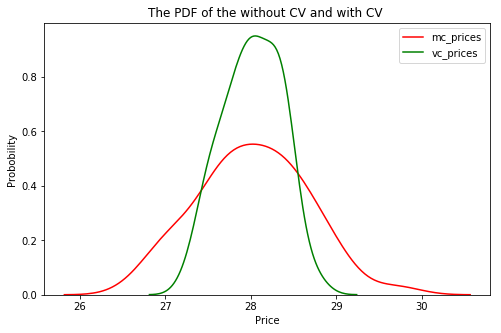

In [171]:
fig = plt.figure(figsize=(8,5))
sns.distplot(mc_prices,kde=True,hist = False,color='r',label='mc_prices')
sns.distplot(vc_prices,kde = True,hist = False,color='g',label='vc_prices')
plt.title('The PDF of the without CV and with CV ')
plt.ylabel('Probobility')
plt.xlabel('Price')
plt.show()

### CDF

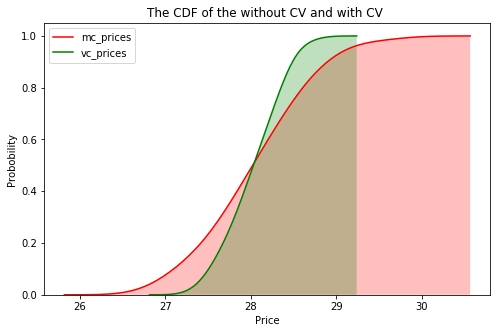

In [172]:
fig = plt.figure(figsize=(8,5))
sns.kdeplot(mc_prices,cumulative=True,shade=True,color='r',label='mc_prices')
sns.kdeplot(vc_prices,cumulative=True,shade=True,color='g',label='vc_prices')
plt.title('The CDF of the without CV and with CV ')
plt.ylabel('Probobility')
plt.xlabel('Price')
plt.show()